In [1]:
from astropy.io import fits
from astropy.table import Table
from astropy.io.fits import getdata
import fitsio
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
import math
from multiprocessing import Pool

In [2]:
file_name = '/mnt/research/data/DELVE/delve_hsc_cat.fits'
data = getdata(file_name, 1)

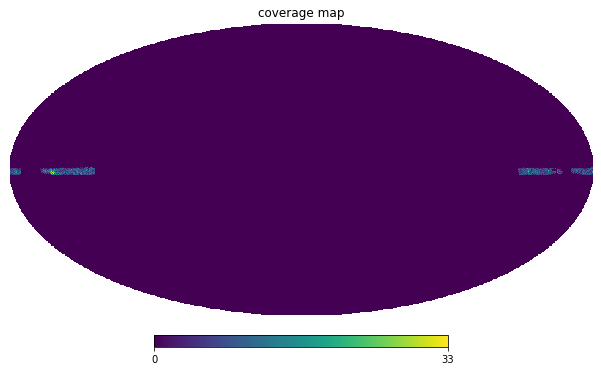

In [3]:
# plot coverage map
dispSides = 4096
coverage_map = np.bincount(hp.ang2pix(dispSides, data['RA'], data['DEC'], lonlat=True), minlength=12*dispSides**2)
hp.mollview(coverage_map, title='coverage map')
plt.show()

percent of objects that are bad:  57.55595307697875


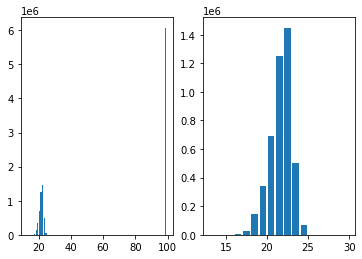

In [4]:
nSides = 32
channel = 'I'

fig1, ax1 = plt.subplots(1,2)

# histogram magnitudes
bright = np.min(data[f'MAG_AUTO_{channel}'])
dim = np.max(data[f'MAG_AUTO_{channel}'])
mag_hist, mag_edges = np.histogram(data[f'MAG_AUTO_{channel}'], \
                                   range=(math.floor(bright),math.ceil(dim)), \
                                   bins=math.ceil(dim)-math.floor(bright))
bin_centers = 0.5 * mag_edges[1:] + 0.5 * mag_edges[:-1]
ax1[0].bar(bin_centers, mag_hist, align='center')

# since there is a spike at magnitude = 99, filter that out and check again
indices = data[f'MAG_AUTO_{channel}'] < 99
true_data = data[indices]
bright = np.min(true_data[f'MAG_AUTO_{channel}'])
dim = np.max(true_data[f'MAG_AUTO_{channel}'])
mag_hist, mag_edges = np.histogram(true_data[f'MAG_AUTO_{channel}'], \
                                   range=(math.floor(bright),math.ceil(dim)), \
                                   bins=math.ceil(dim)-math.floor(bright))
bin_centers = 0.5 * mag_edges[1:] + 0.5 * mag_edges[:-1]
ax1[1].bar(bin_centers, mag_hist, align='center')

print('percent of objects that are bad: ', (1 - len(true_data)/len(data)) * 100)

In [5]:
delve_file_name = '/mnt/research/data/DELVE/delve_overlap.fits'
delve_data = getdata(delve_file_name, 1)
hsc_file_name = '/mnt/research/data/DELVE/hsc_overlap.fits'
hsc_data = getdata(hsc_file_name, 1)

Text(0.5, 1.0, 'HSC')

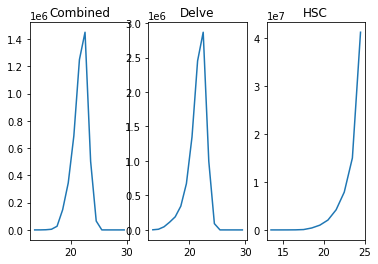

In [7]:
indices = delve_data[f'MAG_AUTO_{channel}'] < 99
true_delve_data = delve_data[indices]

fig2, ax2 = plt.subplots(1,3)

dbright = np.min(true_delve_data[f'MAG_AUTO_{channel}'])
ddim = np.max(true_delve_data[f'MAG_AUTO_{channel}'])
dmag_hist, dmag_edges = np.histogram(true_delve_data[f'MAG_AUTO_{channel}'], \
                                     range=(math.floor(dbright),math.ceil(ddim)), \
                                     bins=math.ceil(ddim)-math.floor(dbright))
dbin_centers = 0.5 * dmag_edges[1:] + 0.5 * dmag_edges[:-1]

hbright = np.min(hsc_data[f'{channel}_cmodel_mag'])
hdim = np.max(hsc_data[f'{channel}_cmodel_mag'])
hmag_hist, hmag_edges = np.histogram(hsc_data[f'{channel}_cmodel_mag'], \
                                     range=(math.floor(hbright),math.ceil(hdim)), \
                                     bins=math.ceil(hdim)-math.floor(hbright))
hbin_centers = 0.5 * hmag_edges[1:] + 0.5 * hmag_edges[:-1]

ax2[0].plot(bin_centers, mag_hist)
ax2[1].plot(dbin_centers, dmag_hist)
ax2[2].plot(hbin_centers, hmag_hist)
ax2[0].set_title('Combined')
ax2[1].set_title('Delve')
ax2[2].set_title('HSC')

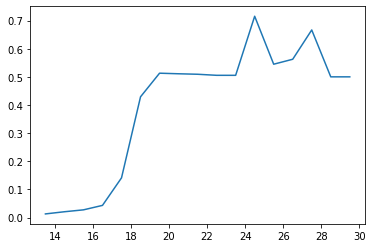

In [9]:
ratio = 1.0 * mag_hist / dmag_hist
plt.plot(bin_centers, ratio)